In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read files and explore:

In [2]:
train_sales=pd.read_csv('data/sales_train.csv.gz')
train_sales.head(20)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [64]:
test_sales=pd.read_csv('data/test.csv.gz')
test_sales.head(10)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
5,5,5,5039
6,6,5,5041
7,7,5,5046
8,8,5,5319
9,9,5,5003


In [4]:
print("train shape",train_sales.shape)
print("test shape",test_sales.shape)

train shape (2935849, 6)
test shape (214200, 3)


In [5]:
items=pd.read_csv('data/items.csv')
shops=pd.read_csv('data/shops.csv')
category_item=pd.read_csv('data/item_categories.csv')

In [6]:
print(items.shape)
items.head(10)

(22170, 3)


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
5,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40
6,***УДАР ПО ВОРОТАМ (UNI) D,6,40
7,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40
8,***ЧАЙ С МУССОЛИНИ D,8,40
9,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40


In [14]:
print(category_item.shape)
print(category_item.head(10))

(84, 2)
        item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4
5      Аксессуары - PSVita                 5
6    Аксессуары - XBOX 360                 6
7    Аксессуары - XBOX ONE                 7
8           Билеты (Цифра)                 8
9          Доставка товара                 9


In [18]:
print(shops.shape)
shops.head(10)

(60, 2)


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [25]:
train_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


# aggregate item count by month:

In [ ]:
sns.countplot(x='A', data=df)

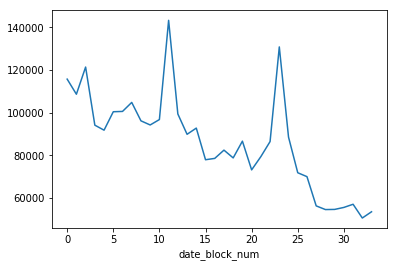

In [12]:
# How many entries are there for each month?
nbr_item=train_sales.groupby("date_block_num")["date_block_num"].count()
nbr_item.plot(x='index',y='date_block_num')

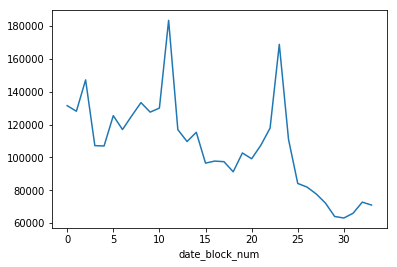

In [14]:
# Get the sum of items sold per month
nbr_sold_item_per_month=train_sales.groupby(['date_block_num'])["item_cnt_day"].sum()
nbr_sold_item_per_month.plot(x='index',y='date_block_num')

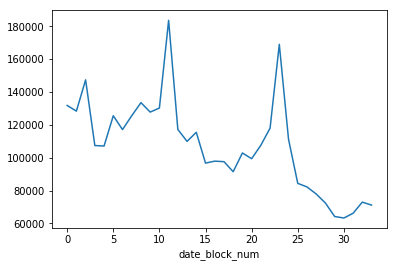

In [15]:
# clean items having negative count.
clean_train_sales=train_sales[train_sales.item_cnt_day>0]
nbr_sold_item_per_month=clean_train_sales.groupby(['date_block_num'])["item_cnt_day"].sum()
nbr_sold_item_per_month.plot(x='index',y='date_block_num')

In [16]:
#final_train_sales=clean_train_sales.groupby(["date_block_num","shop_id","item_id"], as_index=False)[["item_cnt_day"]].sum()
#final_train_sales.head(10)

# aggregate item count per month

In [19]:
final_train=clean_train_sales.groupby(["date_block_num","shop_id","item_id"], as_index=False).agg({'item_cnt_day':'sum','item_price':'mean'})
final_train.columns=final_train.columns.str.replace("item_cnt_day","item_cnt_month")

In [21]:
final_train.head()

,date_block_num,shop_id,item_id,item_cnt_month,item_price
0,0,0,32,6.0,221.0
1,0,0,33,3.0,347.0
2,0,0,35,1.0,247.0
3,0,0,43,1.0,221.0
4,0,0,51,2.0,128.5


# add item category to train set:

In [48]:
final_train_with_cat=final_train.merge(items,on="item_id")
final_train_with_cat=final_train_with_cat[["date_block_num",'shop_id','item_id','item_category_id','item_cnt_month']]

In [49]:
print(final_train_with_cat.shape)
final_train_with_cat.head()

(1608226, 5)


,date_block_num,shop_id,item_id,item_category_id,item_cnt_month
0,0,0,32,40,6.0
1,0,1,32,40,7.0
2,0,3,32,40,3.0
3,0,4,32,40,2.0
4,0,6,32,40,8.0


# add item category to test set:

In [68]:
test_sales=pd.read_csv('data/test.csv.gz')
test_sales=test_sales.merge(items,on="item_id")
test_sales.sort_values(by=["ID"],inplace=True)
test_sales.reset_index(drop=True,inplace=True)
test_sales.drop(["item_name"],axis=1,inplace=True)
test_sales.head()

,ID,shop_id,item_id,item_category_id
0,0,5,5037,19
1,1,5,5320,55
2,2,5,5233,19
3,3,5,5232,23
4,4,5,5268,20


In [73]:
all_cols=["date_block_num",'shop_id','item_id','item_category_id','item_cnt_month']
train_cols=['shop_id','item_id','item_category_id']
target_col='item_cnt_month'

In [70]:
final_train=final_train_with_cat

In [71]:
train_set=final_train[final_train.date_block_num<33]
validation_set=final_train[final_train.date_block_num==33]

In [74]:
train_x=train_set[train_cols]
train_y=train_set[target_col]
val_x=validation_set[train_cols]
val_y=validation_set[target_col]

In [75]:
%%time
from sklearn.ensemble import RandomForestRegressor
rf_regr = RandomForestRegressor(random_state=0, n_estimators=400,n_jobs=-1)
rf_regr.fit(train_x,train_y)

CPU times: user 24min 39s, sys: 3.54 s, total: 24min 43s
Wall time: 6min 14s


In [76]:
preds=rf_regr.predict(val_x)

In [77]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(val_y, np.rint(preds)))

13.196396763332555

# train on the whole data:

In [78]:
X=final_train[train_cols]
y=final_train[target_col]

In [79]:
%%time
rf_regr = RandomForestRegressor(random_state=0, n_estimators=200,n_jobs=-1)
rf_regr.fit(X,y)

CPU times: user 12min 30s, sys: 1.6 s, total: 12min 32s
Wall time: 3min 9s


In [80]:
test_sales.head()

,ID,shop_id,item_id,item_category_id
0,0,5,5037,19
1,1,5,5320,55
2,2,5,5233,19
3,3,5,5232,23
4,4,5,5268,20


In [ ]:
# to run

In [81]:
preds=rf_regr.predict(test_sales[train_cols])

In [84]:
np.rint(preds)[:20]

array([1., 6., 2., 1., 1., 2., 3., 2., 6., 2., 4., 2., 1., 3., 4., 4., 1.,
       1., 4., 2.])

In [140]:
np.arange(0,len(preds))

array([     0,      1,      2, ..., 214197, 214198, 214199])

In [83]:
result=pd.DataFrame({'ID':test_sales['ID'],'item_cnt_month':np.rint(preds)})
result.to_csv('prediction_with_item_cat.csv',index=False)